#Compreensão


Na fase inicial, "Entendimento do Negócio", eu conduzi a análise para definir objetivos de negócios e requisitos específicos do projeto. Identifiquei problemas a serem resolvidos, avaliei recursos disponíveis e elaborei um plano inicial. A seguir irei comentar sobre o processo e desenvolvimento.<br>

**Objetivos do Negócio:**<br>
O objetivo principal é desenvolvimento de sua estratégia de precificação, desenvolver um modelo de previsão de preços a partir de informações oferecidas relevantes para o contexto. Alguns outros objetivos serão:<br><br>
- Maximizar o retorno sobre investimento (ROI): Identificar a melhor região para comprar um apartamento.
- Entender os fatores que influenciam o preço: Descobrir quais variáveis impactam diretamente o valor de aluguel e como elas podem ser otimizadas ou ajustadas para aumentar a receita.<br><br>

**Objetivos da Ciência de Dados:**<br>
O objetivo da ciência de dados, nesse projeto, é desenvolver um modelo robusto que consiga prever o preço do aluguel com base nos dados fornecidos. Isso envolve a seleção de características apropriadas, a escolha de um modelo adequado, o treinamento do modelo nos dados e a validação do modelo.
Os critérios para avaliar o sucesso da ciência de dados **podem** ser MAE (Erro Absoluto Médio), RMSE (Raiz do Erro Quadrático Médio) ou R². Nesse caso utilizarei o RMSE como métrica princial, já que ele da peso a erros maiores devido ao termo quadrático e como estamos lidando com imóveis, diferenças absurdas de preço podem ter consequências maiores.<br><br>


**Plano de Modelagem:**<br>
Nesta fase do projeto, delineamos as estratégias para explorar e otimizar os modelos de aprendizagem de máquina. Abaixo estão os principais pontos  referentes ao plano de modelagem:


* **Modelos a serem experimentados:** Serão conduzidos experimentos com diversos modelos, cada um trazendo suas próprias características. Farei experimentos utilizando modelos baseados em ávores (RF Regressor, GradientBoosting Regressor e etc), modelos lineares e não-lineares. A escolha do modelo ideal dependerá dos resultados obtidos durante os experimentos, considerando as nuances de suas forças e fraquezas.
* **Otimização dos Modelos:** Irei fazer um ajuste nos hiperparâmetros, seleção de características e outras otimizações necessárias para alcançar o melhor resultado possível.
Validação do Modelo: Adotarei a validação cruzada com k-fold estratificado, sendo k=10, principalmente pra evitar overfitting aos dados de treinamento e proporcionando uma avaliação mais confiável da sua eficácia.
* **Avaliação do Modelo:** As métricas de avaliação incluirão a MAE, RMSE e o R², mas a principio, RMSE será a métrica principal conforme explicação anterior.


Temos então um problema de Regressão, pois aqui estamos tentando prever uma variável contínua (um número).

#EDA - Análise exploratória dos dados

Nessa parte, os principais objetivos são compreender a estrutura dos dados, identificar padrões e tendências, detectar anomalias, avaliar a qualidade dos dados e preparar os dados para as etapas subsequentes do processo.

Aqui podemos demonstrar as principais características entre as variáveis e apresentar algumas hipóteses de negócio relacionadas conforme o contexto.

In [67]:
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import folium
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")
%matplotlib inline

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Leitura de dados

In [69]:
path = "/content/drive/MyDrive/Lighthouse/data/teste_indicium_precificacao.csv"

In [70]:
data = pd.read_csv(path)

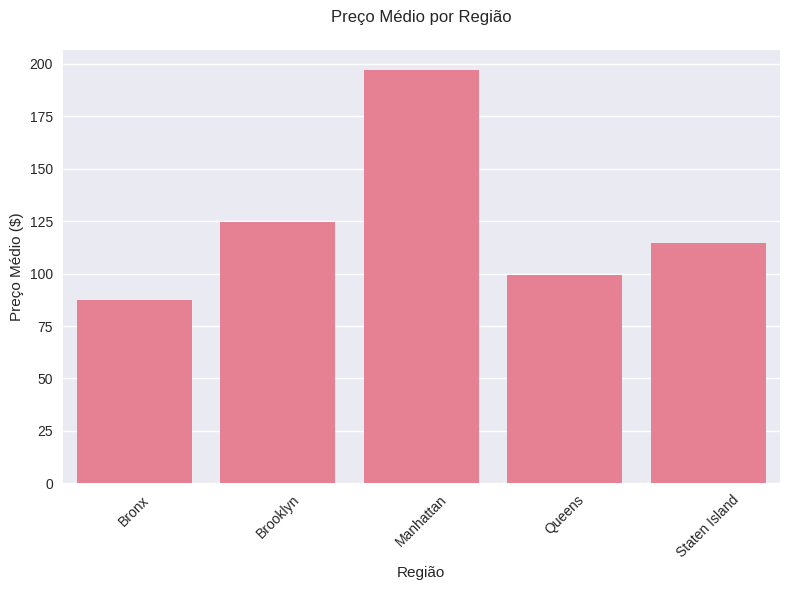

In [71]:
neighborhood_stats = data.groupby('bairro_group').agg({
    'price': 'mean',
    'disponibilidade_365': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=neighborhood_stats, x='bairro_group', y='price', ax=ax1)
ax1.set_title('Preço Médio por Região', pad=20)
ax1.set_xlabel('Região')
ax1.set_ylabel('Preço Médio ($)')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

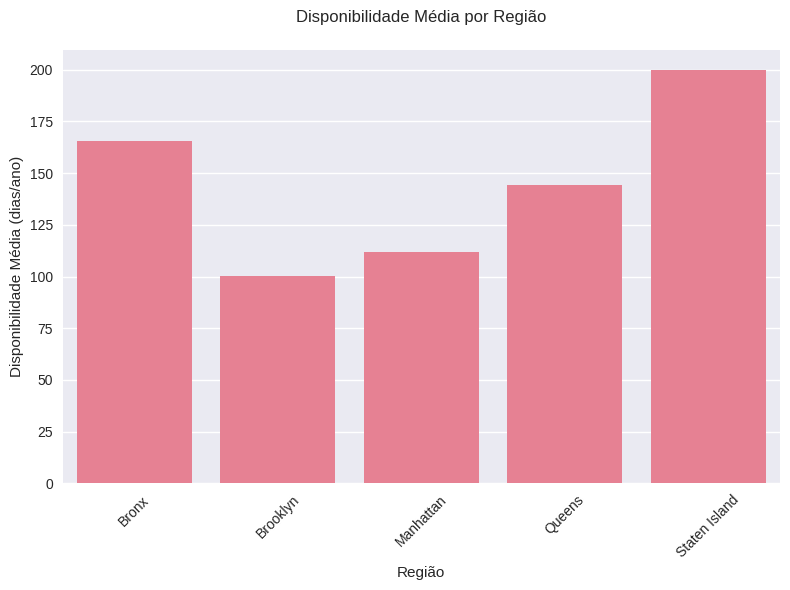

In [72]:
fig, ax2 = plt.subplots(figsize=(8, 6))
sns.barplot(data=neighborhood_stats, x='bairro_group', y='disponibilidade_365', ax=ax2)
ax2.set_title('Disponibilidade Média por Região', pad=20)
ax2.set_xlabel('Região')
ax2.set_ylabel('Disponibilidade Média (dias/ano)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [73]:
print("\nEstatísticas por região:")
print(neighborhood_stats.round(2))


Estatísticas por região:
    bairro_group   price  disponibilidade_365
0          Bronx   87.50               165.76
1       Brooklyn  124.38               100.22
2      Manhattan  196.88               111.98
3         Queens   99.52               144.45
4  Staten Island  114.81               199.68


**1) Onde seria mais indicada a compra de um apartamento para investimento?**

Manhattan apresenta o preço médio mais alto (\$196,87), seguido por Brooklyn (\$124,38). No entanto, para uma decisão de investimento, devemos considerar:

Manhattan tem maior potencial de receita, mas também custos de aquisição mais altos,
Brooklyn oferece um bom equilíbrio entre preço e demanda (20.103 listagens), Queens apresenta preços mais acessíveis (\$99,52) com boa disponibilidade (144 dias/ano)

A recomendação seria:

* Para investidores com alto capital: Manhattan
* Para melhor custo-benefício: Brooklyn
* Para menor investimento inicial: Queens

In [74]:
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

##Verificando valores nulos e duplicados


In [76]:
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)

Missing values before handling:
 id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [77]:
if len(data[data.duplicated()]) > 0:
    print("\n***Entradas duplicadas: ", len(data[data.duplicated()]))
    display(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("\nSem entrada duplicada")


Sem entrada duplicada


##Correlação

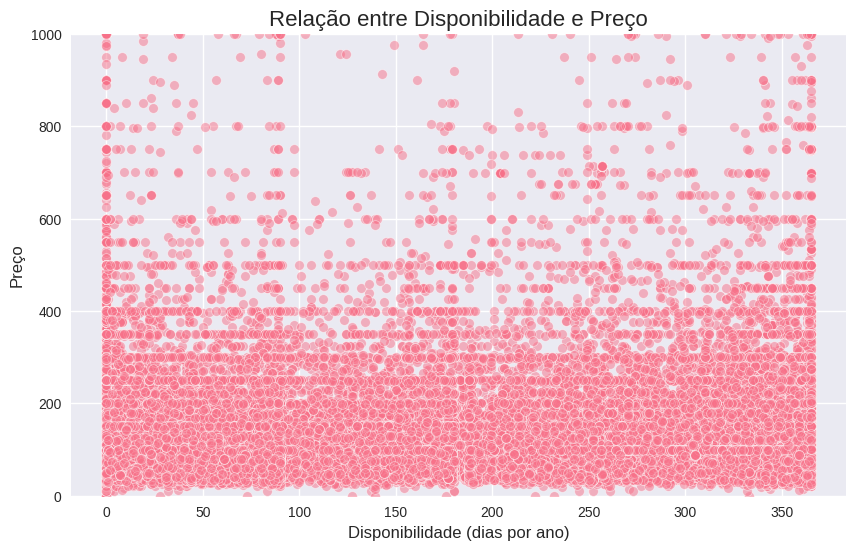

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=data, alpha=0.5)
plt.title("Relação entre Disponibilidade e Preço", fontsize=16)
plt.xlabel("Disponibilidade (dias por ano)", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.ylim(0, 1000)  # Limitar para focar em preços mais comuns
plt.show()

Não há um padrão claro entre a disponibilidade ao longo do ano e o preço. Locais com baixa disponibilidade parecem ter preços variados, o que pode indicar estratégias de precificação baseadas em exclusividade.

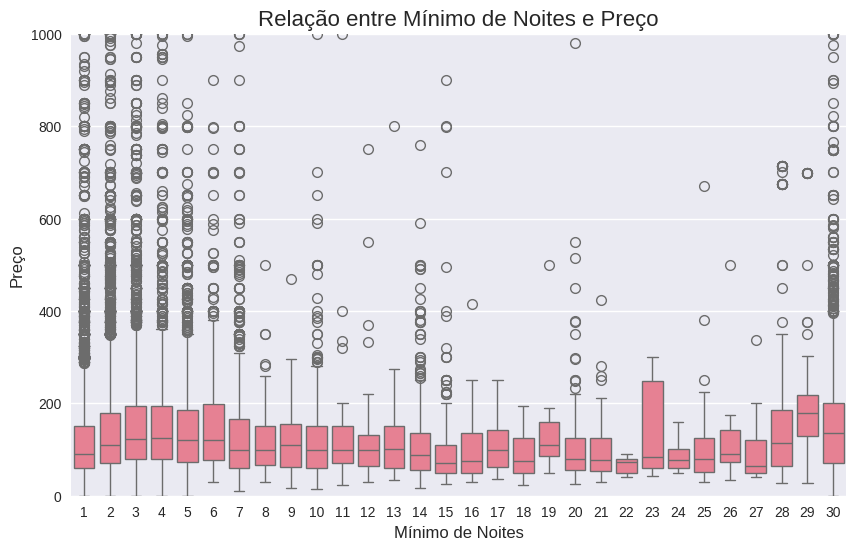

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='minimo_noites', y='price', data=data[data['minimo_noites'] <= 30])
plt.title("Relação entre Mínimo de Noites e Preço", fontsize=16)
plt.xlabel("Mínimo de Noites", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.ylim(0, 1000)  # Limitar visualização para evitar valores extremos
plt.show()

Locais com número mínimo de noites baixo (≤ 5) apresentam grande variabilidade nos preços. Isso sugere que o número mínimo de noites pode ser uma variável interessante, mas precisa ser analisado em conjunto com outras

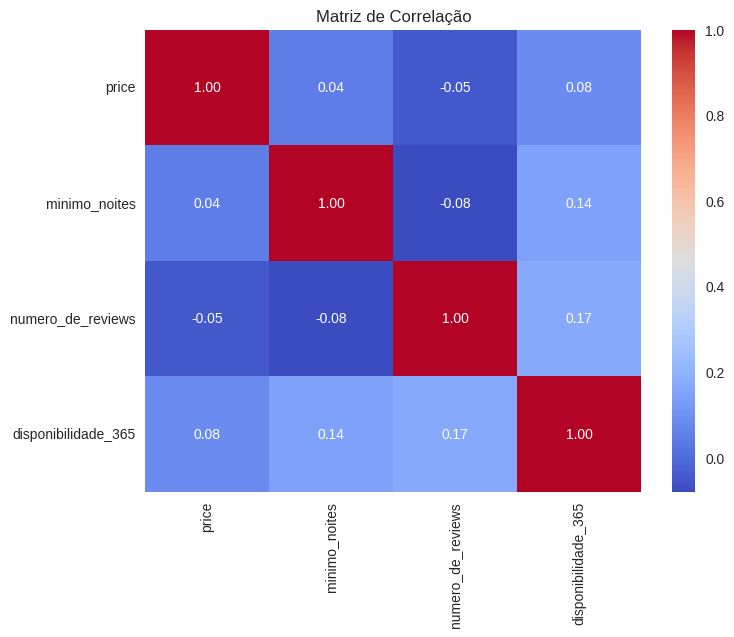

In [80]:
correlation_matrix = data[['price', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

## Identificando padrões nos nomes

In [81]:
data_temp = data
data_temp['categoria_preco'] = pd.qcut(data['price'], q=3, labels=['baixo', 'medio', 'alto'])
altos = data_temp[data_temp['categoria_preco'] == 'alto']['nome']

In [82]:
data_temp['categoria_preco']

,categoria_preco
0,alto
1,medio
2,medio
3,baixo
4,alto
...,...
48889,baixo
48890,baixo
48891,medio
48892,baixo


In [83]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(altos.dropna())

In [84]:
word_counts = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})
word_counts = word_counts.sort_values('count', ascending=False)

In [85]:
print(word_counts.head(10))

           word  count
888     bedroom   2360
712   apartment   2311
733         apt   1810
3161     studio   1397
3465    village   1299
1486       east   1273
2571       park   1133
3062   spacious   1115
2228     luxury   1079
2178       loft   1018


In [86]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_counts['word'], word_counts['count'])))

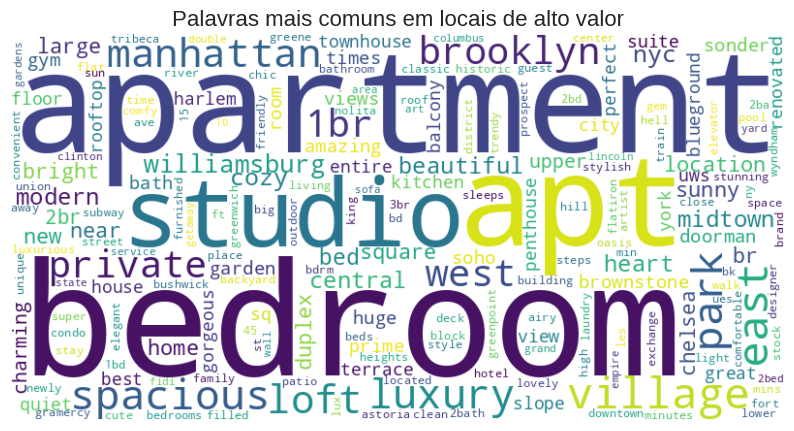

In [87]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais comuns em locais de alto valor', fontsize=16)
plt.show()

Sim, há um padrão nos nomes utilizados para lugares de alto valor, geralmente contém palavras como "luxury", "manhattan", "spacious". Palavras que condizem com lugares de maior custo, seja pela localização ou pelo tamanho e condição dos imóveis.

#Preparação de Dados

## Transformações

Essa parte é interessante pois podemos aplicar uma estrágia para lidar com valores faltantes dependendo da importância dos mesmos. Nesse caso temos que 20% dos valores para "ultima_review" e "reviews_por_mes" e alguns poucos para "nome" e "host_name". Como o número de valores faltantes para nome e host_name é bem pequeno, a gente pode fazer apenas uma imputação e colocar um valor padrão neles ou no nosso caso como são variáveis não muito importantes para nós, podemos apenas deletar as colunas, já no caso das variavéis de review, eu particulamente achei interessante entender a relação entre número de reviews e o preço dos imóveis, então para não perder esses dados importantes eu fiz uma binarização ou feature engineering desse atributo de forma que podemos ver o quão importante ele será no futuro, mas caso ele tenha muita importância, algo interessante a se pensar seria uma análise de sentimento para distinguir reviews positivas e negativas e assim inferir informações mais assertivas!

In [112]:
data['reviews_por_mes'] = data['reviews_por_mes'].fillna(0)
data['ultima_review_presente'] = data['ultima_review'].notnull().astype(int)
data['ultima_review'] = data['ultima_review'].fillna("No review")
data['nome'] = data['nome'].fillna("No name")
data['host_name'] = data['host_name'].fillna("No host_name")

In [113]:
missing_data_summary = data.isnull().sum()
print(missing_data_summary)

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
categoria_preco                  0
ultima_review_presente           0
dtype: int64


## Verificação e remoção de outliers

In [120]:
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

Análise de Outliers e Estatísticas Descritivas:

price:
count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
Número de outliers: 192
Percentual de outliers: 0.39%
Limite inferior: -37.00
Limite superior: 1235.00

minimo_noites:
count    48894.000000
mean         7.030085
std         20.510741
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64
Número de outliers: 469
Percentual de outliers: 0.96%
Limite inferior: -3.00
Limite superior: 45.00

disponibilidade_365:
count    48894.000000
mean       112.776169
std        131.618692
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: disponibilidade_365, dtype: float64
Número de outliers: 0
Percentual de outliers: 0.00%
Limite inferior: 

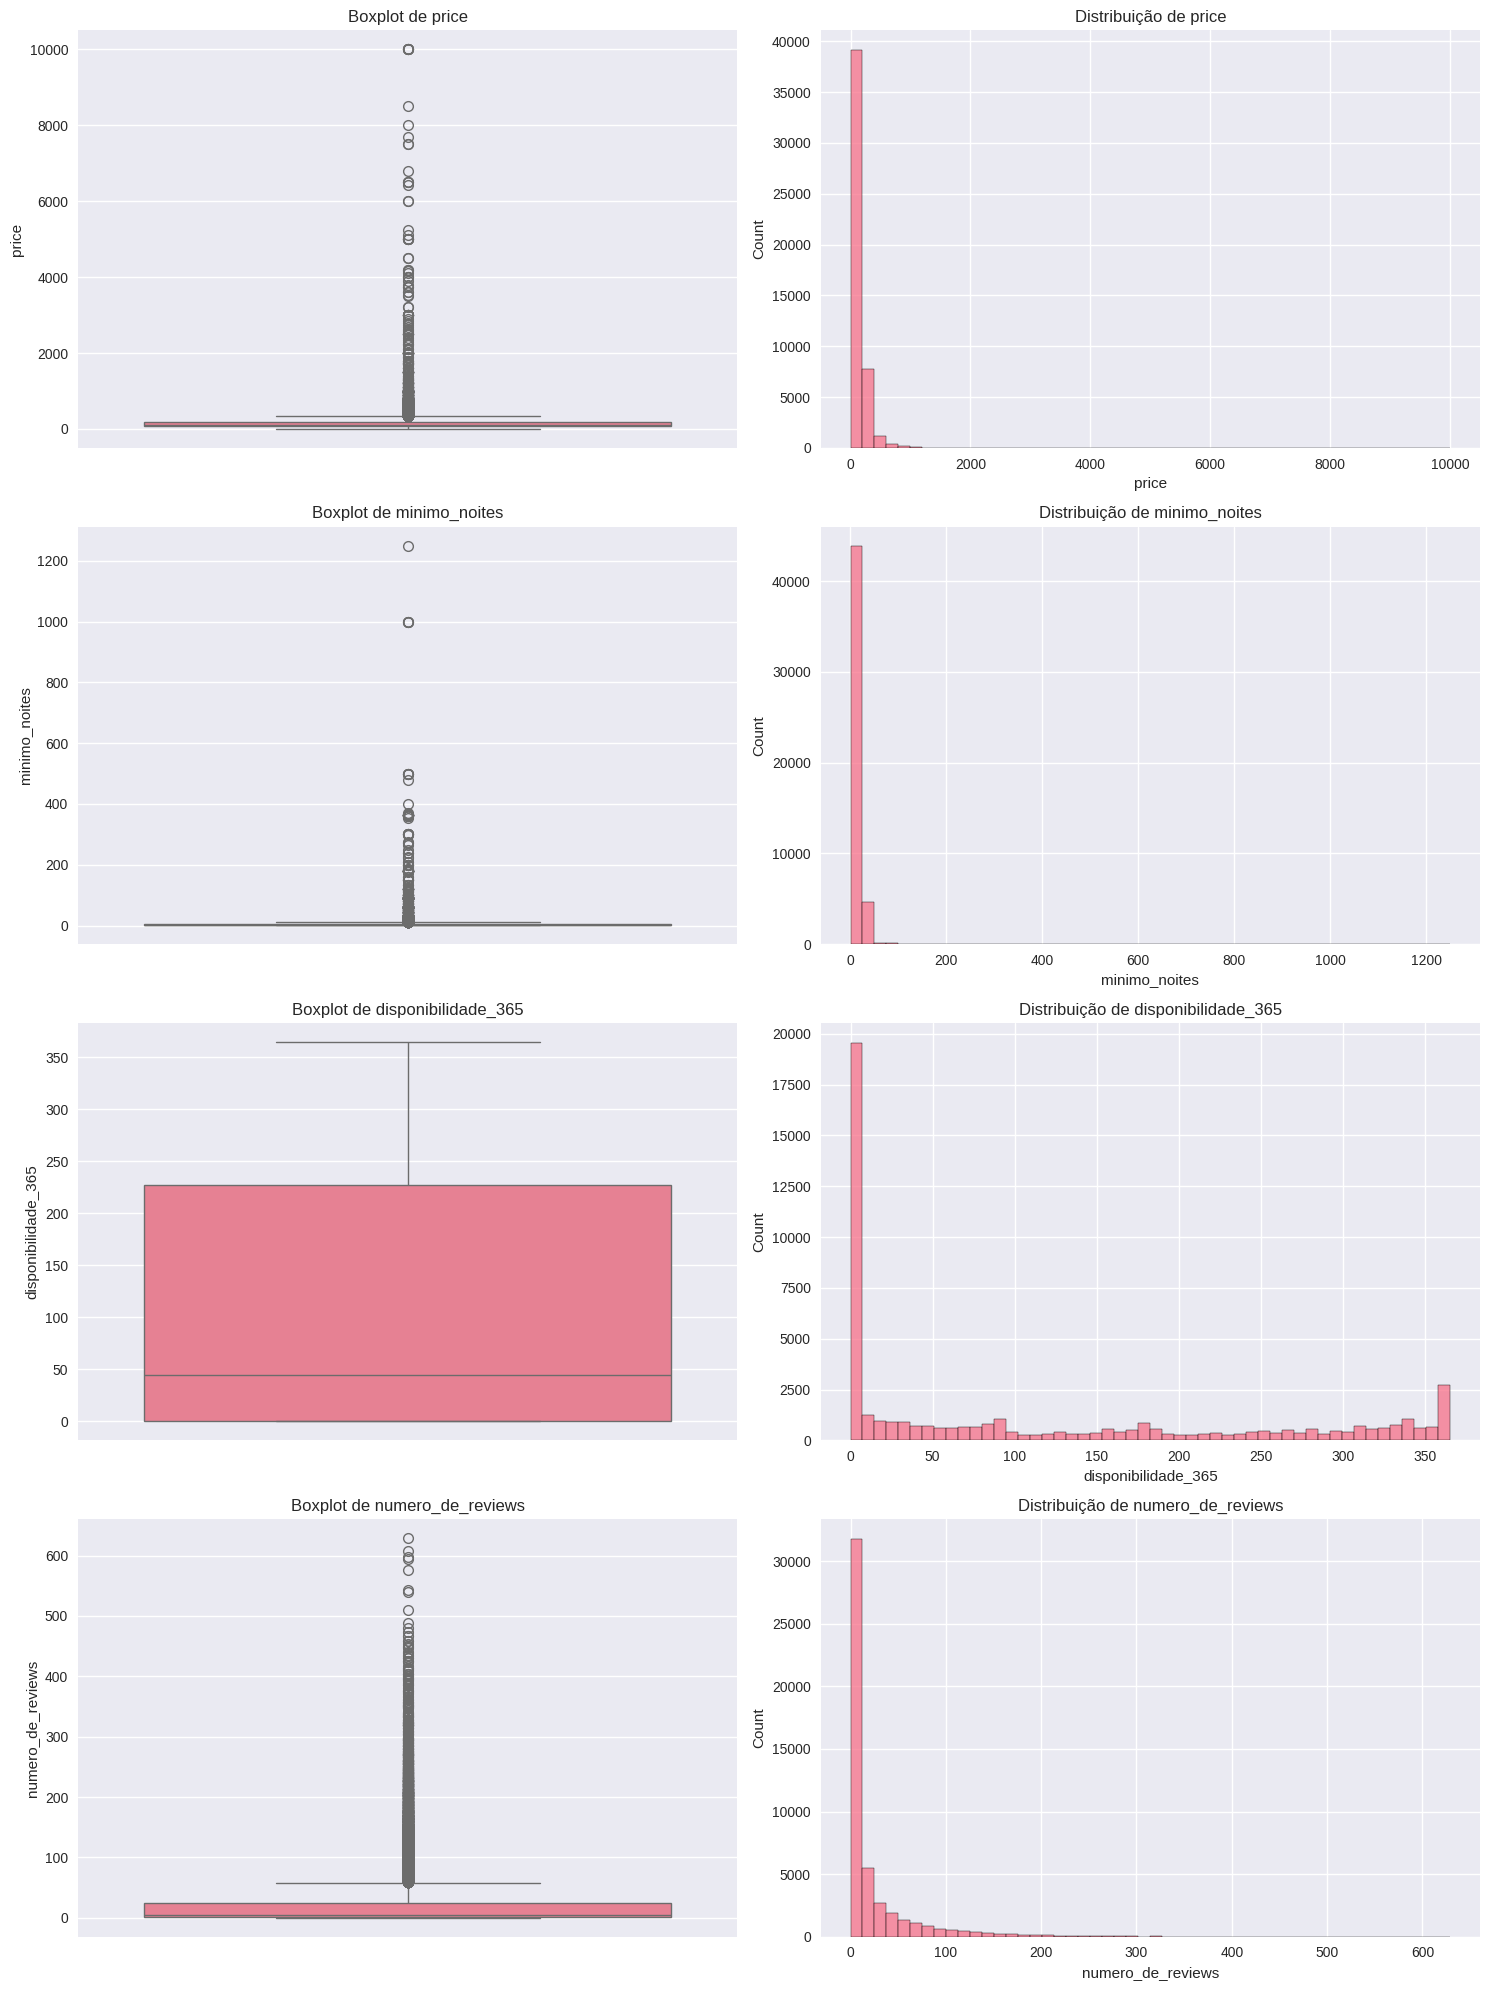

In [115]:
print("Análise de Outliers e Estatísticas Descritivas:")

columns_to_analyze = ['price', 'minimo_noites', 'disponibilidade_365', 'numero_de_reviews']

fig, axes = plt.subplots(len(columns_to_analyze), 2, figsize=(15, 5*len(columns_to_analyze)))

outlier_stats = {}
for idx, column in enumerate(columns_to_analyze):
    stats_desc = data[column].describe()
    print(f"\n{column}:")
    print(stats_desc)

    # Calculando limites para outliers usando IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 10 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outlier_stats[column] = {
        'total': len(outliers),
        'percentage': (len(outliers) / len(data)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    print(f"Número de outliers: {outlier_stats[column]['total']}")
    print(f"Percentual de outliers: {outlier_stats[column]['percentage']:.2f}%")
    print(f"Limite inferior: {lower_bound:.2f}")
    print(f"Limite superior: {upper_bound:.2f}")

    # Boxplot
    sns.boxplot(y=data[column], ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Boxplot de {column}')

    #Histograma
    sns.histplot(data[column], ax=axes[idx, 1], bins=50)
    axes[idx, 1].set_title(f'Distribuição de {column}')

plt.tight_layout()
plt.show()


Estatísticas da limpeza dos dados:
Registros originais: 48894
Registros após limpeza: 48240
Registros removidos: 654
Percentual de dados removidos: 1.34%


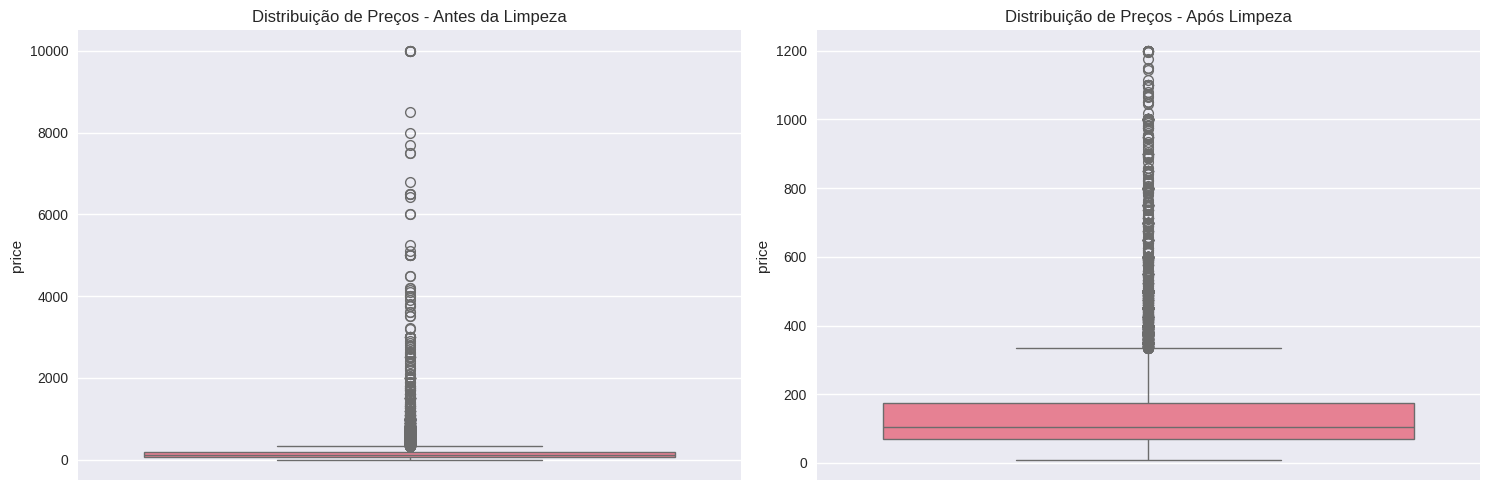

In [116]:
df_clean = data.copy()

# Removendo preços igual a zero ou muito baixos (menos de $10)
df_clean = df_clean[df_clean['price'] >= 10]

# Removendo outliers extremos de preço
price_upper = outlier_stats['price']['upper_bound']
df_clean = df_clean[df_clean['price'] <= price_upper]

# Removendo outliers extremos de noites mínimas
nights_upper = outlier_stats['minimo_noites']['upper_bound']
df_clean = df_clean[df_clean['minimo_noites'] <= nights_upper]

# Removendo outliers de disponibilidade que não fazem sentido
df_clean = df_clean[df_clean['disponibilidade_365'] >= 0]
df_clean = df_clean[df_clean['disponibilidade_365'] <= 365]

# Removendo valores ausentes
df_clean = df_clean.dropna(subset=['price', 'minimo_noites', 'disponibilidade_365'])

print("\nEstatísticas da limpeza dos dados:")
print(f"Registros originais: {len(data)}")
print(f"Registros após limpeza: {len(df_clean)}")
print(f"Registros removidos: {len(data) - len(df_clean)}")
print(f"Percentual de dados removidos: {((len(data) - len(df_clean)) / len(data)) * 100:.2f}%")

# Comparando distribuições antes e depois
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y=data['price'], ax=axes[0])
axes[0].set_title('Distribuição de Preços - Antes da Limpeza')

sns.boxplot(y=df_clean['price'], ax=axes[1])
axes[1].set_title('Distribuição de Preços - Após Limpeza')

plt.tight_layout()
plt.show()

In [117]:
# Salvando estatísticas importantes
price_stats = {
    'before': {
        'mean': data['price'].mean(),
        'median': data['price'].median(),
        'std': data['price'].std()
    },
    'after': {
        'mean': df_clean['price'].mean(),
        'median': df_clean['price'].median(),
        'std': df_clean['price'].std()
    }
}

print("\nEstatísticas de preço antes e depois da limpeza:")
print("\nAntes da limpeza:")
print(f"Média: ${price_stats['before']['mean']:.2f}")
print(f"Mediana: ${price_stats['before']['median']:.2f}")
print(f"Desvio Padrão: ${price_stats['before']['std']:.2f}")

print("\nDepois da limpeza:")
print(f"Média: ${price_stats['after']['mean']:.2f}")
print(f"Mediana: ${price_stats['after']['median']:.2f}")
print(f"Desvio Padrão: ${price_stats['after']['std']:.2f}")

# Exibindo amostras de registros removidos para verificação
print("\nAmostras de registros removidos (preços extremos):")
removed_records = data[~data.index.isin(df_clean.index)].sample(5)[['nome', 'price', 'minimo_noites', 'disponibilidade_365']]
print(removed_records)


Estatísticas de preço antes e depois da limpeza:

Antes da limpeza:
Média: $152.72
Mediana: $106.00
Desvio Padrão: $240.16

Depois da limpeza:
Média: $142.28
Mediana: $105.00
Desvio Padrão: $120.56

Amostras de registros removidos (preços extremos):
                                                    nome  price  \
31030               Long term rental only.  3months min.     42   
32002  Triple Mint Townhouse in the heart of West Vil...   1500   
38590                 1500 SQ FT Williamsburg  Penthouse   1600   
244                  Quiet, clean midtown apt w. elevato    110   
14425             Sun-Filled Bedroom in Artist Apartment     30   

       minimo_noites  disponibilidade_365  
31030             90                   90  
32002              3                   54  
38590              1                    0  
244              200                  140  
14425             50                    0  


##Testando Entradas Duplicadas


In [94]:
#data.drop_duplicates(inplace=True)
#data.duplicated().sum()

Não há necessidade

##Separação dos dados

In [121]:
df_clean.isnull().sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


Vamos mantes as variáveis que nos interessam:

As variáveis selecionadas refletem fatores que influenciam diretamente o preço. "bairro_group" e "bairro" são essenciais, pois a localização afeta significativamente os valores. "room_type" impacta os preços, já que acomodações inteiras tendem a ser mais caras. "minimo_noites" pode influenciar o preço médio por estadia. "numero_de_reviews" foi incluído para avaliar se a popularidade afeta o valor. "calculado_host_listings_count" ajuda a entender o impacto da experiência do anfitrião, e "disponibilidade_365" pode indicar sazonalidade e demanda.

In [96]:
features_relevantes = [
    "bairro_group", "bairro", "room_type", "minimo_noites", "numero_de_reviews", "calculado_host_listings_count", "disponibilidade_365"
]
target = "price"  # Variável de saída

# Separando as features e o target
X = df_clean[features_relevantes]
y = df_clean[target]

In [97]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

print("Features categóricas:", len(categorical_columns))
print(categorical_columns.tolist())
print("\nFeatures numéricas:", len(numerical_columns))
print(numerical_columns.tolist())

Features categóricas: 3
['bairro_group', 'bairro', 'room_type']

Features numéricas: 4
['minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365']


In [98]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

##Normalização/Padronização

Garantir que todas as features tenham a mesma escala, o que pode melhorar a convergência do modelo e a interpretabilidade dos coeficientes do modelo, ainda mais em regressão.

In [99]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
          categorical_columns)
    ])
#pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

#X_processed = pipeline.fit_transform(X)

# Modelos e Avaliação

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform
import numpy as np

## Comitê Heterogêneo

In [101]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [102]:
rf = RandomForestRegressor(random_state=42)
svr = SVR()
linear = LinearRegression()

param_grid_rf = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

param_grid_svr = {
    'C': uniform(0.1, 10),
    'epsilon': uniform(0.01, 1),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

param_grid_linear = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

best_params_ensemble = []  # Para armazenar os melhores parâmetros
best_voting_model = {'rmse': -np.inf, 'model': None}


search_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HalvingRandomSearchCV(rf, param_distributions=param_grid_rf, cv=KFold(n_splits=3), factor=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42))
])
search_rf.fit(X_train, y_train)
search_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HalvingRandomSearchCV(svr, param_distributions=param_grid_svr, cv=KFold(n_splits=3), factor=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42))
])
search_svr.fit(X_train, y_train)
search_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HalvingRandomSearchCV(linear, param_distributions=param_grid_linear, cv=KFold(n_splits=3), factor=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42))
])
search_linear.fit(X_train, y_train)

# Criando o ensemble
estimators = [
    ('rf', search_rf),
    ('svr', search_svr),
    ('linear', search_linear)
]

voting_regressor = VotingRegressor(estimators)
voting_regressor.fit(X_train, y_train)

# Predições
y_pred_rf = search_rf.predict(X_val)
y_pred_svr = search_svr.predict(X_val)
y_pred_linear = search_linear.predict(X_val)
y_pred_voting = voting_regressor.predict(X_val)


n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 6
max_resources_: 23637
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3939
n_resources: 6
Fitting 3 folds for each of 3939 candidates, totalling 11817 fits
----------
iter: 1
n_candidates: 1313
n_resources: 18
Fitting 3 folds for each of 1313 candidates, totalling 3939 fits
----------
iter: 2
n_candidates: 438
n_resources: 54
Fitting 3 folds for each of 438 candidates, totalling 1314 fits
----------
iter: 3
n_candidates: 146
n_resources: 162
Fitting 3 folds for each of 146 candidates, totalling 438 fits
----------
iter: 4
n_candidates: 49
n_resources: 486
Fitting 3 folds for each of 49 candidates, totalling 147 fits
----------
iter: 5
n_candidates: 17
n_resources: 1458
Fitting 3 folds for each of 17 candidates, totalling 51 fits
----------
iter: 6
n_candidates: 6
n_resources: 4374
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 7
n_candidates: 2
n_re

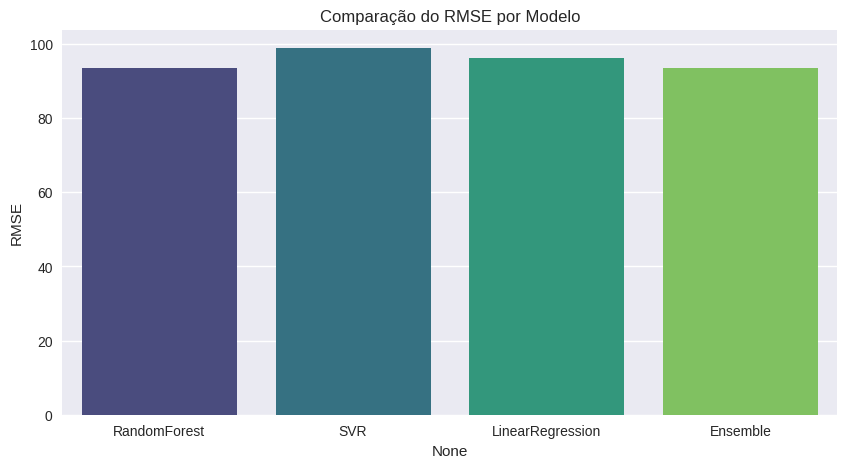

In [103]:
# Avaliação dos modelos
metrics = {}
for name, y_pred in zip(['RandomForest', 'SVR', 'LinearRegression', 'Ensemble'],
                         [y_pred_rf, y_pred_svr, y_pred_linear, y_pred_voting]):
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    metrics[name] = {'RMSE': rmse, 'R²': r2}

metrics_df = pd.DataFrame(metrics).T

# Gráfico de comparação de RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], palette='viridis')
plt.ylabel("RMSE")
plt.title("Comparação do RMSE por Modelo")
plt.show()

In [104]:
metrics_df

,RMSE,R²
RandomForest,93.519940,0.384401
SVR,98.939293,0.310988
LinearRegression,96.378190,0.346197
Ensemble,93.479641,0.384932


Como esperado, um modelo baseado em árvore apresentou o melhor resultado para nosso problema de regressão pois ele consegue capturar mais informações dos dados, como interações entre variáveis e relações não-lineares e ainda apresenta uma robustez a outliers. Assim, usando um Ensemble e capturando o que há de melhor em cada modelo, conseguimos um resultado ainda melhor.

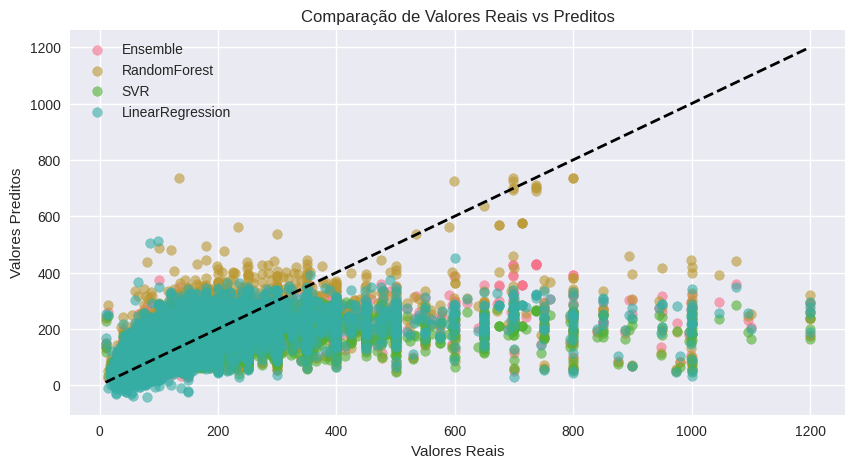

In [105]:
# Gráfico de valores reais vs preditos

plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_pred_voting, label="Ensemble", alpha=0.6)
plt.scatter(y_val, y_pred_rf, label="RandomForest", alpha=0.6)
plt.scatter(y_val, y_pred_svr, label="SVR", alpha=0.6)
plt.scatter(y_val, y_pred_linear, label="LinearRegression", alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2)  # Linha ideal
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação de Valores Reais vs Preditos")
plt.legend()
plt.show()

Perceba que o modelo não está prevendo valores muito altos com certa precisão, mas valores mais baixo se aproximam dos valores reais, isso indica um possível viés, a causa pode ser a quantidade baixa de valores altos que acabam prejudicando o aprendizado do modelo, que foi mitigada no processamento de dados, ou pode ser a escolha dos modelos, entre outras causas que podem ser estudadas adiante.

In [109]:
example = {
    'id': [2595],
    'nome': ['Skylit Midtown Castle'],
    'host_id': [2845],
    'host_name': ['Jennifer'],
    'bairro_group': ['Manhattan'],
    'bairro': ['Midtown'],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['Entire home/apt'],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'ultima_review': ['2019-05-21'],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355],

}
example_df = pd.DataFrame(example)
preco_exemplo = voting_regressor.predict(example_df)
print(preco_exemplo)

[288.09176036]


De acordo com o nosso modelo, a sugestão de preço para exemplo dado seria entorno de $288.09.

## Avaliação

Análise dos Modelos:

**Random Forest:**
- Prós: Modelo robusto a outliers, capaz de capturar relações não lineares e interações entre variáveis.
- Contras: Pode ser mais lento para prever novos dados devido à complexidade do ensemble de árvores.

**SVR (Support Vector Regression)**
- Prós: Bom para capturar relações complexas e funciona bem com dados de alta dimensionalidade.
- Contras: Desempenho inferior neste caso, possivelmente devido à sensibilidade a outliers e dificuldades no ajuste dos hiperparâmetros.

**Regressão Linear**
- Prós: Simples, interpretável e eficiente em termos computacionais.
- Contras: Assumindo relações lineares entre variáveis, pode não capturar padrões mais complexos nos dados.

**Ensemble (Voting Regressor)**
- Prós: Combina as vantagens dos três modelos, reduzindo o erro e aumentando a estabilidade das previsões.
- Contras: Pode ser mais custoso computacionalmente e difícil de interpretar, pois mistura diferentes abordagens.

**Conclusão:**

O Ensemble se destacou como a melhor abordagem, pois reduziu o erro (RMSE menor) e obteve a melhor capacidade de explicação dos dados (R² maior). No entanto, se o foco for interpretabilidade e velocidade, a regressão linear pode ser mais adequada.

Lembrando que a escolha do modelo foi baseada em testar diferentes abordagens para problemas de regressão e depois misturá-las e observar se houve uma melhora. Então um modelo baseado em árvore, um não-linear e um linear foram escolhidos e depois foi feito um ensemble com eles.

In [119]:
import joblib
joblib.dump(search_rf, 'random_forest.pkl')
joblib.dump(search_svr, 'svr.pkl')
joblib.dump(search_linear, 'linear_regression.pkl')
joblib.dump(voting_regressor, 'ensemble.pkl')

['ensemble.pkl']